<h1><center> PPOLS564: Foundations of Data Science </center><h1>
<h3><center> Lecture 20 <br><br><font color='grey'> 
Multivariable functions and how to optimize them </font></center></h3>

## Concepts Covered:

- Multivariate functions
- Partial Derivatives
- The Gradient
- The Jacobian 
- Second-order and cross-partial derivatives
- The Hessian
- Unconstrainted Optimization
- Using `sympy` to walk through the multivariate optimization steps

In [1]:
import numpy as np
import numpy.linalg as la
import requests
from sympy import *
init_printing(use_unicode=True)

# Define sympy symbols
x,y  = symbols('x y')

In [2]:
# Read in Visualization code from Github (requires plotly module)
exec(requests.get('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/visualization_library/plotly_graph_functions.py').content)
mv = multivar()

loaded!


# Multivariate Functions

<br>
<br>

$$f(x): A \to B$$

<br>
<br>

Where values from set $A$, where $x \in A$, are mapped to values in set $B$

However, as we saw in linear algebra, sets need not be confined to one dimension. That is, set $A$ need no be limited to  $\mathbb{R}$ but rather can encompass $\mathbb{R}^n$.

<br>
<br>

$$\textbf{f(x)} : \mathbb{R}^n \to \mathbb{R}^m$$

<br>
<br>

**scalar multi-variable value** functions take the following forms:

<br>
<br>

$$f(x,y,z) = 3xy - y^2z + 2$$

<br>
<br>

$$f(\textbf{x}) = f(x_1,x_2,x_3) =\frac{x_1 x_2}{x_3}$$

<br>
<br>

where $\textbf{x}$ is a vector of values.

<br>
<br>

**Vector-value multi-variable functions** that take in some $n$ number of variables and spit out $m$ number of mapped locations: $\mathbb{R}^n \to \mathbb{R}^m$. These vector functions can be thought of as being composed of multiple components $f_i(\cdot)$.

<br>
<br>

$$ \textbf{f}(x,y,z) = \begin{pmatrix} f_1(x,y,z) \\ f_2(x,y,z) \\ f_3(x,y,z) \\ f_4(x,y,z)   \end{pmatrix} =  \begin{pmatrix} xyz \\ 2x+\frac{y}{z} \\ z-y^x \\ y^2 + x^2 + z^2   \end{pmatrix}$$

<br>
<br>

As we've seen if $\textbf{f(x)}$ is linear (review "linear combination"), then we can rewrite it as $\textbf{Ax}$ for some transformation matrix  $\textbf{A}$.

However, we are often dealing with non-linear functions. As such, we need to employ either quadratic approximations or think about concepts like "local-linearity".

## Visualizing multivariate functions

In short, like vectors and matrices, beyond a point, it's hard and or impossible to visualize higher dimensional space. That said, I'll introduce two types of plots in the bivariate setting that might help us think through some concepts: 3D surface plots and contour plots (with heat map coloring elements).  

In [3]:
# For this example, consider the following function
f = x**2 + y**2
f

#### 3D Surface Plots

In [4]:
mv.plot_3d(f)

#### Contour Plots

In [5]:
mv.plot_contour(f)

# Partial Derivatives

What is the change in the function in one of the input variables, _holding all else constant_?

Consider the following function:

<br>
<br>

$$ f(x,y) = 2x+y^2 $$

<br>
<br>

How should we think about the output of $f(x,y)$ when we nudge $x$ a little bit? We'll nudge it and just leave the other variable $y$ be.

<br>
<br>

$$ \frac{\partial f(x,y) }{\partial x}  = \lim_{h\to0} \frac{f(x+h,y) - f(x,y)}{h}$$

<br>
<br>

$$ \lim_{h\to0} \frac{ (2x+h)+y^2 - (2x+y^2)}{h} $$ 

<br>
<br>

$$ \lim_{h\to0} \frac{ (2x+h) - 2x + y^2 - y^2}{h} $$ 

<br>
<br>

$$ \lim_{h\to0} \frac{ 2(x+h - x) }{h} $$ 

<br>
<br>

$$ \lim_{h\to0} \frac{ 2h }{h} $$ 

<br>
<br>

$$ \frac{\partial f(x,y) }{\partial x}  = 2 $$ 

Note that: Everything that is **_not_** $x$ effectively gets **treated as a constant**. Why? Because we aren't nudging it, so nothing changes, so those terms drop out.

**Notation** 

<br>
<br>

$$ \frac{\partial f }{\partial x} = \frac{\partial }{\partial x} f = \partial_x f = f_x $$


<br>
<br>

# The Gradient

The first order derivative of a function is now a component of many things. Sure, it's $\frac{\partial }{\partial x} f$ but it's also $\frac{\partial }{\partial y} f$ and so on. The function is _multivariate_ and each of those variables corresponds with a dimension. Thus, we want information about how the function changes given a nudge along all those dimensions. 

Luckily, there is a way of capturing and storing this information as a vector. We call this the **gradient vector** and it is denoted with the symbol $\nabla$. 

$$ \nabla = \begin{pmatrix} \partial_{x_1} \\ \partial_{x_2} \\ \vdots \\ \partial_{x_m}   \end{pmatrix} $$

The gradient vector is an operator where each element of the vector is the partial derivative with respect to one of the available variables. We write $\nabla f$ for the gradient of the scalar function $f$

### Calculating the gradient

Again, let's use the scalar value function from above:

<br>
<br>

$$f(x,y) = 2x+y^2$$

<br>
<br>

We know that 

<br>
<br>

$$f_x = 2$$ 

<br>
<br>

And we can use the same method to calculate $f_y$

<br>
<br>

$$f_y = 2y$$

<br>
<br>

Now we stack the results

<br>
<br>

$$\nabla f = \begin{pmatrix} 2 \\ 2y \\ \end{pmatrix}$$

<br>
<br>

### What is the gradient?

Note that the gradient is outputs a vector, which we can visualize.

In [6]:
mv.plot_gradient(f)

$\nabla f $ points in the direction of steepest ascent: the direction in which the function of $f$ **increases most rapidly**, and its **magnitude is the rate of this increase**. It tells us how to climb the hill.

**Another example**

Say we have function 

<br>
<br>

$$g(x,y) = x + .0001y $$

<br>
<br>

The gradient would be 

<br>
<br>

$$ \nabla g =  \begin{pmatrix} 1 \\ .0001 \\ \end{pmatrix} $$

<br>
<br>

the gradient of $g$ points most prominently in the direction of the x-axis. This means that it is moving most rapidly in that direction.

### Directional Derivative

Say we want to know how fast the function increases in some other direction $\vec{v}$. To figure this out, we can just take the dot product of the gradient of the function with a vector in the direction of interest. 

<br>
<br>

$$ \nabla f \cdot \vec{v} =  \begin{pmatrix} 2 \\ 2y \\ \end{pmatrix} \cdot \vec{v}$$

<br>
<br>

This tells us the rate at which $f$ changes as one moves in the direction of $\vec{v}$. Given how we can conceptualize movement in a multivariate setting is more nuanced, the directional derivative offers a way for us to make particular movements in particular directions. 

For example, say 

<br>
<br>

$$ \textbf{x} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}  $$

<br>
<br>

$$ \textbf{v} = \begin{pmatrix} 3 \\ 2 \end{pmatrix}  $$

<br>
<br>

$$\nabla f (x) \cdot \textbf{v} = \begin{pmatrix} 2 \\ 2(1) \end{pmatrix} \cdot \begin{pmatrix} 3 \\ 2 \end{pmatrix} = 2(3) + 2(2) = 10$$ 

<br>
<br>

The rate of change starting at $\textbf{x}$ and changing to $\textbf{v}$ is 10.

## The Jacobian Matrix

For vector-valued functions, isolating the first-order partial derivatives is more involved but nothing new from what we've seen before.

Consider the following vector-valued function from before:

<br>
<br>


$$ \textbf{f}(x,y) = \begin{pmatrix} xy \\ x^2 + y^2 \\ y-2x \end{pmatrix}$$


<br>
<br>

We capture information about the first order derivatives of $\textbf{f}$ using a special matrix called a **Jacobian Matrix**. Note that $\textbf{f}$ takes in two variable inputs and outputs a 3-dimensional vector. The dimensions of this matrix will correspond with this 2 in, 3 out arrangement. 

<br>
<br>

$$ \textbf{f}(x,y) = \begin{pmatrix} f^1(x,y) \\ f^2(x,y) \\ f^3(x,y) \end{pmatrix}$$

<br>
<br>

$$ \textbf{J} = \begin{pmatrix}  f_x^1(x,y) & f_y^1(x,y)\\ 
f_x^2(x,y) &  f_y^2(x,y) \\
f_x^3(x,y) &  f_y^3(x,y) \end{pmatrix} = 
\begin{pmatrix}  y & x\\ 
2x &  2y \\
-2 &  1 \end{pmatrix} $$

<br>
<br>

All in all, the Jacobian is just a generalization of the gradient for a vector-valued function. You'll see the Jacobian used for linear approximations of functions (see reading). 

## Second-order and cross-partial derivatives

As we saw last time, taking the higher order derivatives of a function can tell us important information about the shape of a curve. 

Taking **second-order partial derivations** follows the same logic we encountered in the univariate context (with slightly different notation). 

<br>
<br>

$$ \frac{\partial^2}{ \partial x^2 } = f_{xx}$$

<br>
<br>

Consider the function 

$$ f(x,y) = 2y^2x^3$$

<br>
<br>

<br>
<br>

$$ f_x = 6y^2x^2$$ 

<br>
<br>

$$ f_{xx} = 12y^2x$$ 

<br>
<br>

Likewise,

$$ f_y = 4x^3y$$ 

<br>
<br>

$$ f_{yy} = 4x^3 $$ 

<br>
<br>

We can also take the **cross-partial derivative** (or the **mixed-partial derivative**): that is, we can first take the derivative with respect to one variable and then take that partial derivate with respect to another variable.

<br>
<br>

$$ f_x = 6y^2x^2$$

$$ f_{xy} = \frac{\partial^2 f}{\partial_y \partial_x} = 12yx^2$$

<br>
<br>

Likewise, 

<br>
<br>

$$ f_y = 4x^3y$$ 

<br>
<br>

$$ f_{yx} = \frac{\partial^2 f}{\partial_x \partial_y} = 12x^2y $$

<br>
<br>

Note something interesting here 

<br>
<br>

$$ f_{yx} = f_{xy}$$ 

<br>
<br>

$$ 12yx^2 = 12x^2y $$

<br>
<br>

The order in which we differentiate doesn't matter!

## The Hessian 

A multidimensional analog to the second derivative, the Hessian provides us a way to record information about the second-order partial derivatives and the cross-partial derivatives. 

Again, consider:

<br>
<br>

$$ f(x,y) = 2y^2x^3$$

<br>
<br>

We can concisely store this information as a matrix.

<br>
<br>

$$ \textbf{H} =\begin{pmatrix} f_{xx} & f_{yx} \\f_{xy} &  f_{yy}\end{pmatrix}$$

<br>
<br>

$$ \textbf{H} =\begin{pmatrix} 12y^2x & 12yx^2 \\12yx^2 &  4x^3\end{pmatrix}$$

<br>
<br>

where the diagonal of $\textbf{H}$ describes the second-order partials and the off-diagonal describes the cross-partials. Note that the Hessian is both a square and symmetric matrix. As we'll see below, this means we can decompose it. Moreover, its eigenvalues will be instrumental when evaluating minima/maxima.

# Optimizing in Multiple Dimensions

> <font color = "grey" > Disclaimer: note that we are discussing _unconstrained optimization_, so we'll avoid thinking about the boundaries of some functional domain for now. Later on, we'll introduce this topic as constraints on our optimization problems. </font>

Consider the function:

<br>
<br>

$$ f(x,y) = x^2 + y^2 + xy $$

<br>
<br>

### Isolating critical values

As was the case in the univariate setting, we want to find our extrema candidates by isolating the stationary points in the function. Thus, let's hunt for the locations where the first-order derivatives are 0. We can do this by setting the gradient to 0.

<br>
<br>

$$\nabla f = \textbf{0} $$

<br>
<br>

where $\textbf{0}$ equals the zero vector.

<br>
<br>

$$ \nabla f = \begin{pmatrix} 2x + y \\ 2y + x \end{pmatrix} $$

<br>
<br>

$$ \begin{pmatrix} 2x + y \\ 2y + x \end{pmatrix} = \textbf{0} $$

<br>
<br>

$$ 2x + y = 0 \\  2y + x = 0 $$

<br>
<br>

$$ y = -2x \\  2(-2x) + x = 0 $$

<br>
<br>

$$ y = -2x \\  x = 0 $$

<br>
<br>

$$ y = 0 \\  x = 0 $$

<br>
<br>

So we only have one candidate entry

<br>
<br>

$$ \textbf{x*} = \begin{pmatrix} x_0^* \\ y_0^* \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$ 

<br>
<br>

## Classifying Extrema

Recall that stationary points are where the "action happens" but we only care about certain kinds of actions. In particular, we want to know where the function is maximized/minimized. Thus, we must classify if a function is a local maxima or minima.

Recall that we leveraged the second-order derivatives to figure out if a function was convex (minimum), concave (maximum), or an inflection (saddle) around a stationary point. We'll we do exactly the same thing here, except we have to use our more nuanced conceptualization of the second derivative: the **Hessian**!

<br>
<br>

$$ \textbf{H} =\begin{pmatrix} f_{xx} & f_{yx} \\f_{xy} &  f_{yy}\end{pmatrix}$$

<br>
<br>

In fact, the determinant of the **Hessian** tells us what we want to know. 

<br>
<br>

$$ |\textbf{H}| =f_{xx}f_{yy} -  f_{xy}^2 $$

<br>
<br>

### Interpreting $|\textbf{H}|$ 


If $|\textbf{H}|  > 0 $, then we know a maxima/minima exists at the stationary point.

If $|\textbf{H}|  < 0 $, then we know the stationary point is a saddle point.

If $|\textbf{H}|  = 0 $, then it's undefined (insufficient information)

#### What is the determinant of the Hessian actually telling us?

- $f_{xx} \to $ is the function concave/convex in the $x$ direction?


- $f_{yy} \to $ is the function concave/convex in the $y$ direction?


- $f_{xx}f_{yy} \to $ is there agreement with regard to the concavity/convexity along the two dimensions?
    - if they agree, then this product will be positive. 
    - if they disagree, i.e. one axis says one thing, the other says another thing, then this product will be negative. 
    
    
- $f_{xy}^2 \to $ how much does the interaction of the dimensions muddle the story?
    - if the interaction is really pronounced, then this influence can outweight the agreement along the first term.

#### A visual

In [7]:
c = 0 # There is no interaction in the y*x dimension
f = x**2 + y**2 + c*(x*y)
mv.plot_3d(f)
# Why is this??

In [8]:
c = 5 # increase c; no there is a significant intraction
f = x**2 + y**2 + c*(x*y)
mv.plot_3d(f)
# Why is this??

Let's actually apply this...

<br>
<br>

$$ \nabla f = \begin{pmatrix} 2x + y \\ 2y + x \end{pmatrix} $$

<br>
<br>

$$ \textbf{H} =\begin{pmatrix} 2 & 1 \\1 &  2\end{pmatrix}$$

<br>
<br>

$$ |\textbf{H}| = (2)(2) - (1)(1) = 3 $$

<br>
<br>

### Making the call

Okay, so it's an extrema, but which type? We'll to make this call, we just need to evaluate the signs of the second-order partial derivatives. 

Given $|\textbf{H}| > 0$, then 

- if $f_{xx} = +$ and $f_{yy} = +$, $\textbf{x}^*$ is a **local minima**.

- if $f_{xx} = -$ and $f_{yy} = -$, $\textbf{x}^*$ is a **local maxima**.

So in the case of $f$, our stationary point is _local minima_. To actually get this minimum value, we plug the points back into $f$,

<br>
<br>

$$ f(x_0^*,y_0^*) = f(0,0) = 0^2 + 0^2 + 0(0) = 0 $$

<br>
<br>

### What about when there are more than two variable inputs?

The above is straightforward enough when dealing with two variables, but as we know, calculating the determinant for a matrix becomes increasingly more involved as the dimensions of the matrix grows: that is, as we begin to consider more and more variables. 

Luckily, there is a familiar solution: leverage the **eigenvalues**! 

Specifically, given that $|\textbf{H}| \ne 0$, we want to determine if the Hessian matrix is:

- **positive definite**: if all eigenvalues for $\textbf{H}$ evaluated at $\textbf{x}^*$ are positive, then the matrix is positive definite and we can conclude that $\textbf{x}^*$ is a local minimum. 
- **negative definite**: if all eigenvalues for $\textbf{H}$ evaluated at $\textbf{x}^*$ are positive, then the matrix is negative definite and we can conclude that $\textbf{x}^*$ is a local maxima. 
- **indeterminate**: if the eigenvalues are a mix of positive and negative values. 

Again if $|\textbf{H}| = 0$ then the second derivative test is inconclusive.


**Given our intuition of eigenvalues and vectors, why might this make sense?**

## A friendly guide to unconstrained optimization: step-by-step

In summary, the steps:

1. find $\nabla f$
2. find stationary points: set $\nabla f = \textbf{0}$
3. calculate the Hessian $\textbf{H}$
4. calculate the determinant of $\textbf{H}$ for each stationary point.
    - if $|\textbf{H}_{x*}| > 0$, a min/max exists
    - if $|\textbf{H}_{x*}| < 0$, saddle point
    - if $|\textbf{H}_{x*}| = 0$, undetermined
5. calculate the eigenvalues of $\textbf{H}$ for all remaining stationary points. 
    - if all $\lambda > 0$, local minima.
    - if all $\lambda < 0$, local maxima.
    - if all $\lambda > 0$ and $\lambda < 0$, indeterminant .
    - if all $\lambda = 0$, undefined.
6. plug the remaining values back into $f$, find the highest or lowest. 

## Using `sympy` in a multivariate optimization problem

As we've seen before, sympy requires that we initialize a unique data type for its class of symbols.

In [9]:
x,y = symbols('x y') # This is repeat from above...

### Practice 1

Let's find all critical points and determine whether they are minima, maxima, or neighter for the function 

$$ g(x,y) = x^2 + 6xy + y^2 - 18x - 22y +5 $$

In [10]:
g = x**2 + 6*x*y + y**2 - 18*x - 22*y + 5
g

In [11]:
# Step 1: Calculate the gradient 
g_x = g.diff(x)
g_y = g.diff(y)
grad = [g_x,g_y]
grad

In [12]:
# Step 2: Set gradient to 0 and locate the stationary points
crit_points = solve(grad,[x,y])
crit_points

In [13]:
# Step 3: Calculate the Hessian
g_xx = g_x.diff(x)
g_xy = g_x.diff(y)
g_yy = g_y.diff(y)
g_yx = g_y.diff(x)
H = np.matrix([[g_xx,g_xy],[g_yx,g_yy]],dtype='float')
H

matrix([[2., 6.],
        [6., 2.]])

In [14]:
# Step 4: Calculate the determinant of H
la.det(H)

The determinant is negative! This means we're dealing with a saddle point. Let's inspect visually to see if this is, in fact, the case.

In [15]:
mv.plot_3d(g)

Sure enough there doesn't appear to be any emerging extrema

### Practice 2

Let's find all critical points and determine whether they are minima, maxima, or neighter for the function 

$$ t(x,y) = - x^{2} - 3 y^{2} + y $$

In [16]:
t = -x**2+y+-3*y**2
t

In [17]:
grad = [t.diff(term) for term in [x,y]]
grad

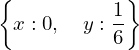

In [18]:
cp = solve(grad,[x,y])
cp # One critical point

In [19]:
H = [t.diff(term).diff(term2) for term in [x,y] for term2 in [x,y]]
H = np.matrix(H,dtype='float').reshape(2,2)
H

matrix([[-2.,  0.],
        [ 0., -6.]])

In [20]:
# Positive! Let's continue...
la.det(H)

In [21]:
evals = la.eigvals(H)
evals 

array([-2., -6.])

The eigenvalues are all negative, so we can conclude that $x^* = (0,\frac{1}{6})$ is a global maxima.

Plug that value back into $t$

In [22]:
t.evalf(subs={x:0,y:(1/6)})

Does that seem right?

In [23]:
mv.plot_3d(t)